output distribution size =  2000


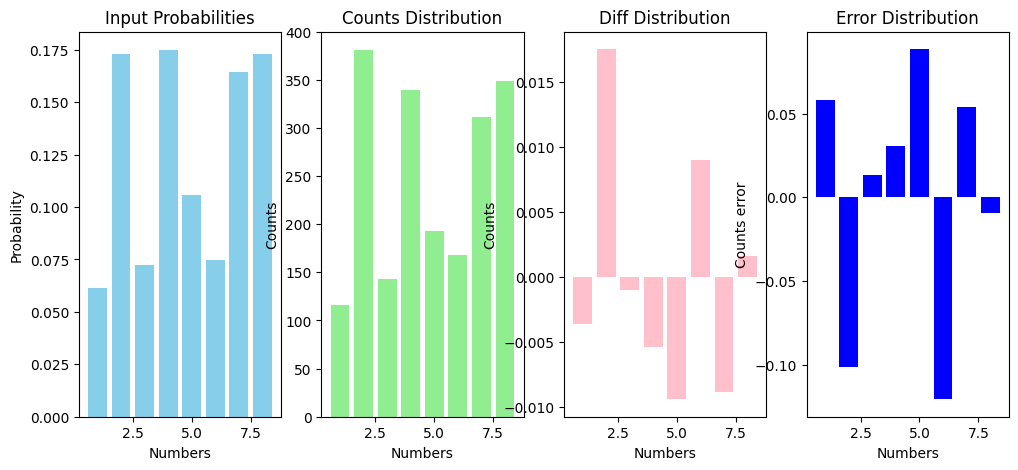

: 

In [ ]:
""" Generate a distribution of numbers using a given set of probabilities. 
    The distribution is generated by repeating the given probabilities a given number of times (numbers length*multiplier).
    The output is a vector of numbers.
    It plots the input probabilities, the output distribution and the difference between them, along with the normalized counts error."""


# Import required libraries
import matplotlib.pyplot as plt
import numpy as np


# clear probabilities
probabilities =[]


# Function to generate distribution
def generate_distribution(numbers, probabilities, multiplier):
    n = len(numbers)
    if n != len(probabilities):
        print("len(numbers) = ", n , " len(probabilities) = ", len(probabilities))
        raise ValueError("The length of numbers and probabilities must be the same.")

    if abs(sum(probabilities) - 1) > 1e-6:
        raise ValueError("Probabilities must sum up to 1.")

    # Calculate the size of the output vector
    output_size = n * multiplier
    print("output distribution size = ", output_size)

    # Generate the distribution
    output_vector = np.random.choice(numbers, size=output_size, p=probabilities)

    return output_vector

def generate_random_probabilities(length):
    if length <= 0:
        raise ValueError("Length must be a positive integer.")

    # Generate random numbers
    random_values = np.random.random(length)

    # Normalize to sum up to 1
    probabilities = random_values / random_values.sum()

    return probabilities

# Function to plot the results
def plot_results(numbers, probabilities, output_vector):
    # Count the occurrences in the output vector
    counts = [np.sum(output_vector == number) for number in numbers]
    # Normalize the counts to sum up to 1
    norm_counts = [count / sum(counts) for count in counts]
    diff_counts = [norm_counts[i] - probabilities[i] for i in range(len(numbers))]

    # counts error (normalized counts - probabilities)/probabilities
    counts_error = [(probabilities[i]-norm_counts[i])/probabilities[i] for i in range(len(numbers))]

    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(12, 5))

    # Plot 1: Input probabilities
    axes[0].bar(numbers, probabilities, color='skyblue')
    axes[0].set_title('Input Probabilities')
    axes[0].set_xlabel('Numbers')
    axes[0].set_ylabel('Probability')

    # Plot 2: Output distribution
    axes[1].bar(numbers, counts, color='lightgreen')
    axes[1].set_title('Counts Distribution')
    axes[1].set_xlabel('Numbers')
    axes[1].set_ylabel('Counts')

    # plot 3: distribution the diff_counts (normalized counts - probabilities)
    axes[2].bar(numbers, diff_counts, color='pink')
    axes[2].set_title('Diff Distribution')
    axes[2].set_xlabel('Numbers')
    axes[2].set_ylabel('Counts')

    # plot 4: distribution the counts_error (normalized counts - probabilities)/probabilities
    axes[3].bar(numbers, counts_error, color='blue')
    axes[3].set_title('Error Distribution')
    axes[3].set_xlabel('Numbers')
    axes[3].set_ylabel('Counts error')


    plt.show()

# Example data
# numbers = [1, 2, 3, 4]
# probabilities = [0.1, 0.3, 0.4, 0.2]  # This should sum up to 1
# multiplier => [p(1-p)] / (0.2-p)^2 * len(groups) = 57
multiplier = 250  # This is the number of times we want to repeat the distribution


# generate vector of int numbers using range
num = 8 # max group number of 25 with 250 multiplier
numbers = list(range(1, num+1))

# Generate random probabilities
probabilities = generate_random_probabilities(num)
print("probabilities = ", probabilities)

# Generate distribution and plot the results
output_vector = generate_distribution(numbers, probabilities, multiplier)
plot_results(numbers, probabilities, output_vector)


In [12]:
numbers = [1, 2, 3, 4]
probabilities = [0.1, 0.48, 0.4, 0.02]  # This should sum up to 1
# multiplier => [p(1-p)] / (0.2-p)^2 * len(groups) = 57
p = np.min(probabilities)
# calcutale the multiplier
multiplier = int((p*(1-p)) / ((0.2-p)**2) * len(numbers))
print(multiplier)

2


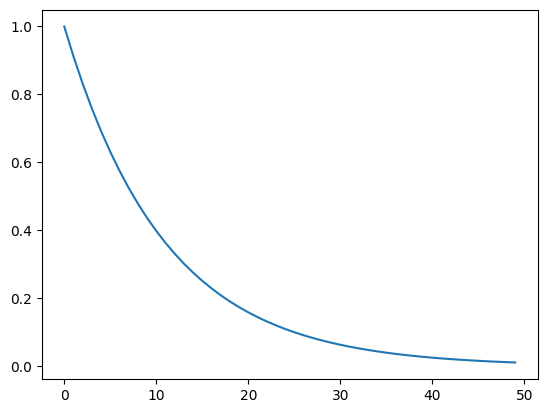

In [12]:
from matplotlib import pyplot as plt
a = range(0, 50)
numbers = list(a) 
n1= 10
decay = 25
y =  [n1** (-num/decay) for num in numbers]
plt.plot(numbers, y)
plt.show()

In [7]:
# create similar probabilities apperance to all groups in ordered sequence
import numpy as np
ngroups = 4  # number of groups
groups_number = list(range(1, ngroups + 1))  # list of groups from 1 to ngroups
#group_probabilities = [(round(1 / ngroups, 2))] * ngroups
group_probabilities = 1/ngroups * np.ones(ngroups)  # equal probabilities for each group
print("group_probabilities = ", group_probabilities)

group_distribution_number = 20  # is the number of times each group is presented in the sequence
n_presentations = ngroups * group_distribution_number
#sequence = np.random.choice(groups_number, size=n_presentations, p=group_probabilities).tolist()
sequence = np.repeat(groups_number, group_distribution_number).tolist()
print("Sequence of groups:", sequence)

group_probabilities =  [0.25 0.25 0.25 0.25]
Sequence of groups: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Pixel distribution: {0: 1039627, 10: 1, 15: 1, 24: 1, 29: 1, 36: 1, 49: 1, 55: 1, 60: 1, 71: 1, 77: 1, 80: 1, 81: 1, 82: 1, 88: 1, 96: 1, 104: 5, 112: 1, 116: 1, 120: 1, 124: 1, 143: 1, 147: 1, 150: 1, 173: 1, 208: 1, 215: 1, 227: 1, 247: 3, 255: 19}


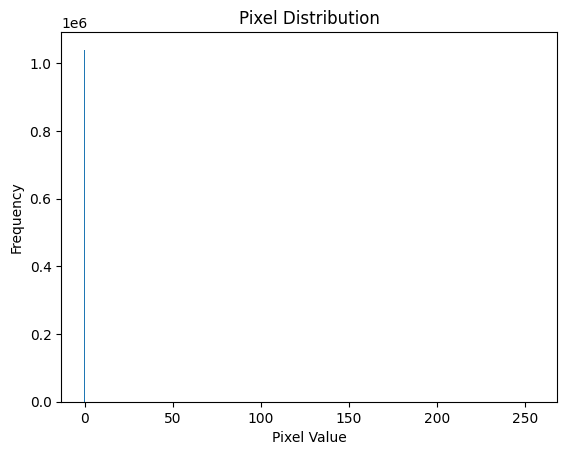

In [3]:
# load bmp image from D:\DATA\Patterns\23455\DMD\3.bmp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 


image_path = r"D:\DATA\Patterns\23455\DMD\3.bmp"
image = Image.open(image_path)  
# display the image
image.show()
# display the distribution of the pixels in the image
image_array = np.array(image)
# Flatten the image array to a 1D array
flattened_image = image_array.flatten()
# Count the occurrences of each pixel value
unique, counts = np.unique(flattened_image, return_counts=True)
# Create a dictionary of pixel values and their counts
pixel_distribution = dict(zip(unique, counts))
# Print the pixel distribution
print("Pixel distribution:", pixel_distribution)
# Plot the pixel distribution
plt.bar(pixel_distribution.keys(), pixel_distribution.values())
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Distribution')
plt.show()  


In [3]:
#tiling of a 2D array with sqaure tiles
import numpy as np
import cv2
import os
# Define the directory to save the square tiles
Squares = r"D:\DATA\Patterns\Squares_114px"
if not os.path.exists(Squares):
    os.makedirs(Squares)


dmd_shape = (1140, 912)  # height, width
square_size = 114  # size of the square in pixels
rows = dmd_shape[0] // square_size
cols = dmd_shape[1] // square_size
frame_idx = 0

for r in range(rows):
            for c in range(cols):
                image = np.zeros(dmd_shape, dtype=np.uint8)
                y_start = r * square_size
                x_start = c * square_size
                image[y_start:y_start + square_size, x_start:x_start + square_size] = 255

                filename = os.path.join(Squares, f"frame_{frame_idx:04d}.bmp")
                cv2.imwrite(filename, image)
                frame_idx += 1


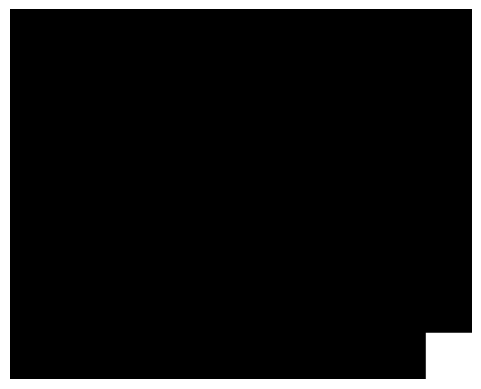

In [2]:
%matplotlib inline

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

folder_path = r'D:\DATA\Patterns\23455\DMD\squares'
image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith('.bmp')])
frames = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_GRAYSCALE) for f in image_files]

fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='gray', vmin=0, vmax=255)
ax.axis('off')

def update(i):
    im.set_array(frames[i])
    return [im]

ani = FuncAnimation(fig, update, frames=len(frames), interval=100, blit=True)

HTML(ani.to_html5_video())


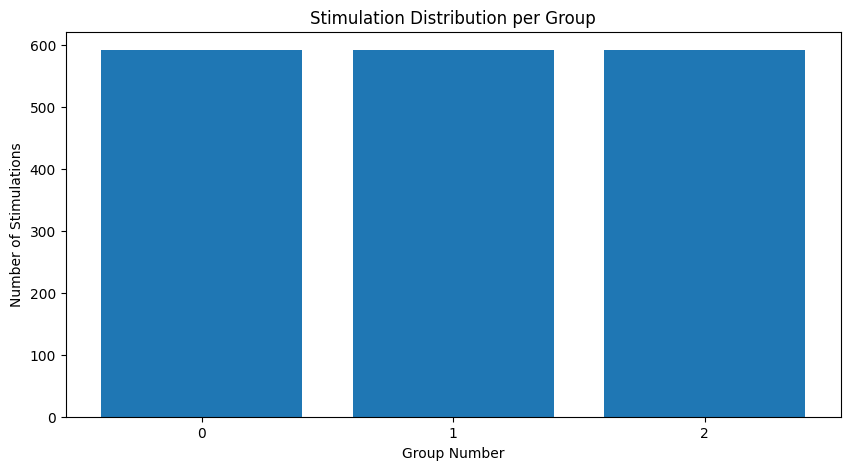

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def generate_stim_sequence(n_cells, group_size, subgroup_size, total_group_stims, m=2):
    # Step 1: Create major groups
    k_groups = n_cells // group_size
    all_cells = np.random.permutation(np.arange(1, n_cells + 1))
    groups = [all_cells[i * group_size: (i + 1) * group_size] for i in range(k_groups)]

    # Step 2: Create and normalize group probabilities
    raw_probs = [m ** -i for i in range(k_groups)]
    total = sum(raw_probs)
    group_probs = [p / total for p in raw_probs]

    # Step 3: Generate initial stimulation sequence
    initial_sequence = np.random.choice(range(k_groups), size=total_group_stims, p=group_probs)

    # Step 4: Equalize stimulation counts
    stim_counts = Counter(initial_sequence)
    max_stims = stim_counts[0]
    final_sequence = list(initial_sequence)

    for group_id in range(1, k_groups):
        current_stims = stim_counts.get(group_id, 0)
        needed_stims = max_stims - current_stims

        if needed_stims > 0:
            # Divide group into subgroups
            group_cells = groups[group_id]
            n_subgroups = len(group_cells) // subgroup_size
            subgroups = [group_cells[i * subgroup_size: (i + 1) * subgroup_size] for i in range(n_subgroups)]

            # Distribute needed stimulations randomly among subgroups
            added_stims = np.random.choice([group_id] * n_subgroups, size=needed_stims)
            final_sequence.extend(added_stims)

    # Plotting
    final_counts = Counter(final_sequence)
    labels = list(range(k_groups))
    counts = [final_counts.get(i, 0) for i in labels]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts)
    plt.xlabel('Group Number')
    plt.ylabel('Number of Stimulations')
    plt.title('Stimulation Distribution per Group')
    plt.xticks(labels)
    plt.show()

    return final_sequence



# Example usage

n_cells = 100  # Total number of cells
group_size = 30  # Number of cells in each group
subgroup_size = 3  # Number of cells in each subgroup
total_group_stims = 1000  # Total number of stimulations to distribute

stim_sequence = generate_stim_sequence(n_cells, group_size, subgroup_size, total_group_stims)

In [5]:
# create ceil division function
def ceil_div(a, b):
    return -(-a // b)  # This uses integer division to achieve ceiling division
# Example usage of ceil_div
print("Ceil division of :", ceil_div(21, 5))  # Output: 


Ceil division of : 5
